In [21]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
gsea_df = pd.read_csv('../exp/GSEA_qvalues.csv', index_col = 0)
wall_df = pd.read_csv('../exp/pathway_qvalues.csv', index_col = 0)
wall_df

,Cluster 1 p-values,Cluster 1 q-values,Cluster 10 p-values,Cluster 10 q-values,Cluster 2 p-values,Cluster 2 q-values,Cluster 3 p-values,Cluster 3 q-values,Cluster 4ER+ p-values,Cluster 4ER+ q-values,...,Cluster 5 p-values,Cluster 5 q-values,Cluster 6 p-values,Cluster 6 q-values,Cluster 7 p-values,Cluster 7 q-values,Cluster 8 p-values,Cluster 8 q-values,Cluster 9 p-values,Cluster 9 q-values
Mismatch Repair,6.241272,5.648739,17.348992,17.037792,0.704541,0.541851,29.350417,28.112790,2.880431,2.694920,...,4.998150,4.490901,0.825261,0.669221,17.143862,15.835654,17.576867,16.973549,52.594921,49.278113
Bicarbonate transporters,0.768496,0.656350,45.128498,44.492025,0.717496,0.551443,10.239429,9.611040,12.350612,11.775743,...,5.793053,5.231356,2.133136,1.693122,1.981170,1.799812,21.852697,21.111076,49.225853,46.384717
Transport of connexons to the plasma membrane,1.824347,1.565205,1.725382,1.649491,2.233251,1.550381,3.134174,2.848370,7.233808,6.868822,...,1.275170,1.109425,2.498172,1.977243,13.020137,12.059354,21.866636,21.123858,49.224404,46.384717
Interleukin-6 family signaling,4.175020,3.719746,2.163572,2.073878,2.855057,1.972927,20.031476,19.049121,28.520360,27.393883,...,0.796537,0.699574,1.962413,1.557827,0.603401,0.553295,5.929757,5.648778,41.399405,38.684657
NOSIP mediated eNOS trafficking,6.938334,6.280490,6.012616,5.847177,2.021953,1.434309,3.681270,3.354800,12.971072,12.369431,...,0.485555,0.447729,7.346667,5.683071,2.515340,2.296135,21.791882,21.053713,38.593533,35.975694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tandem of pore domain in a weak inwardly rectifying K+ channels (TWIK),0.531948,0.466047,31.605110,31.137721,0.573774,0.462328,19.523090,18.566117,8.297847,7.897492,...,2.561520,2.247741,3.814466,2.970414,0.752217,0.684606,0.814653,0.761953,0.301989,0.301518
Lysine catabolism,0.778810,0.665035,0.570741,0.547516,0.342294,0.323902,2.689938,2.430644,0.515602,0.489989,...,5.049096,4.539822,2.408501,1.917118,2.258735,2.057204,5.866135,5.586354,0.301989,0.301518
Activation of NOXA and translocation to mitochondria,0.377092,0.355005,21.005066,20.656273,5.560194,3.823169,2.525368,2.281177,12.438164,11.858976,...,1.635905,1.421873,1.395676,1.115895,1.208319,1.097255,2.905071,2.735011,0.301937,0.301518
Breakdown of the nuclear lamina,0.482125,0.428479,5.905325,5.740804,4.107528,2.790719,1.074848,0.966212,1.540606,1.430083,...,5.834232,5.269472,3.358691,2.620704,7.658947,7.118840,2.494413,2.342552,0.301678,0.301468


In [17]:
gsea_df_counts = {}

for column in gsea_df.columns:
    columnshape = gsea_df[gsea_df[column] >= 3].shape[0]
    print(columnshape)
    gsea_df_counts[column] = columnshape

126
11
102
177
23
41
21
94
64
1
89


In [18]:
wall_df_counts = {}

for column in wall_df.columns:
    columnshape = wall_df[wall_df[column] >= 3].shape[0]
    print(columnshape)
    wall_df_counts[column] = columnshape

880
828
1624
1614
247
78
1093
1048
1328
1303
1075
1028
905
839
457
290
1168
1126
1383
1353
792
723


In [37]:
wal_df = wall_df.loc[:, wall_df.columns.str.endswith('q-values')]
new_name = {}
for i in wal_df.columns:
    new_i = i.strip('Cluster q-values')
    new_name[i] = new_i
    
wal_df = wal_df.rename(columns =new_name)

wall_df_counts = {}
for column in wal_df.columns:
    columnshape = wal_df[wal_df[column] >= 3].shape[0]
    print(columnshape)
    wall_df_counts[column] = columnshape

wall_df_counts['4ER-'] = wall_df_counts.pop('4ER')
wall_df_counts

828
1614
78
1048
1303
1028
839
290
1126
1353
723


{'1': 828,
 '10': 1614,
 '2': 78,
 '3': 1048,
 '4ER+': 1303,
 '5': 839,
 '6': 290,
 '7': 1126,
 '8': 1353,
 '9': 723,
 '4ER-': 1028}

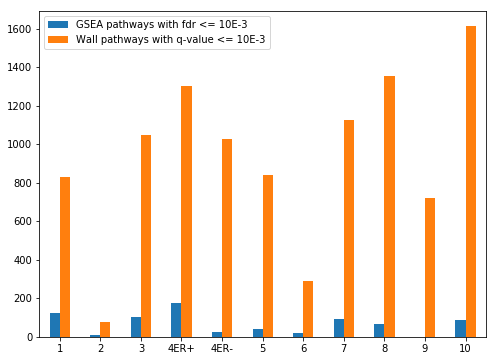

In [51]:
full_df = pd.DataFrame({'GSEA pathways with fdr <= 10E-3': gsea_df_counts, 
                       'Wall pathways with q-value <= 10E-3': wall_df_counts})
ax = full_df.plot.bar(rot=0, figsize=(8, 6))
ax

In [52]:
fig = ax.get_figure()
fig.savefig('gsea_wall_comparison.png')